In [231]:
# importações iniciais
import pandas as pd

df = pd.read_csv('imoveis.csv')
df

,tamanho,preco
0,35.00,40000
1,50.00,90000
2,60.00,200325
3,69.01,340452
4,73.50,430436
5,77.00,515000
6,80.00,560000
7,85.00,730563
8,94.00,945900
9,105.50,1125630


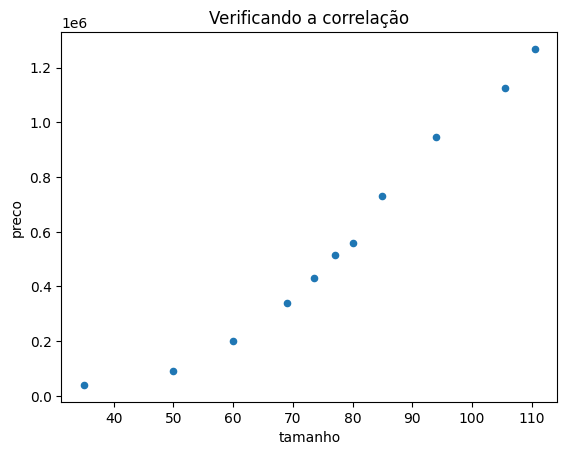

In [232]:
# gráfico de dispersão (scatterplot) entre diâmetro e preço (para verificar a correlação)
df.plot(kind="scatter", x="tamanho", y="preco", title="Verificando a correlação");



In [233]:
# usando o scikit-learn para criar o modelo de regressão
from sklearn import linear_model

# criando o modelo
# modelo = linear_model.LinearRegression()
modelo = linear_model.LinearRegression()

# treinando o modelo (passando o tamanho e o preço dos imoveis)
x = df[["tamanho"]]  # usando dois colchetes para retornar em formato de lista/df
y = df[["preco"]]
modelo.fit(x,y)


LinearRegression()

In [234]:
# com o modelo treinado, podemos fazer previsões
#print(modelo.predict([[80]])[0][0])  # usando um valor que conhecemos
print(modelo.predict([[80]])[0][0])

632769.3718898753


c:\Users\Ed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [235]:
print(modelo.predict([[200]])[0])

[2746524.1482454]


c:\Users\Ed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\Ed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


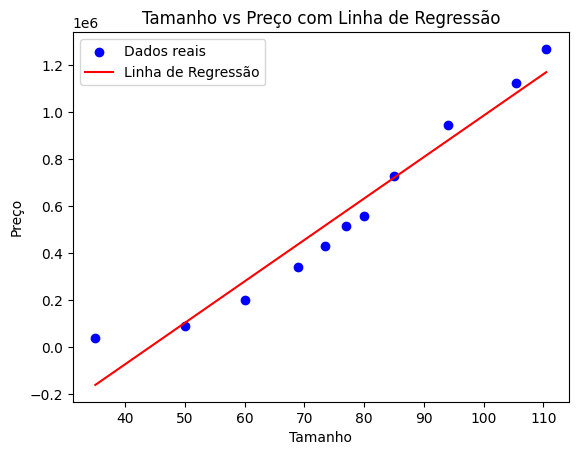

In [236]:
import matplotlib.pyplot as plt
import numpy as np

# Previsões da linha de regressão
x_range = np.linspace(df['tamanho'].min(), df['tamanho'].max(), 100).reshape(-1, 1)  # Geração de valores para a linha
y_pred = modelo.predict(x_range)

# Plotar os dados reais
plt.scatter(df['tamanho'], df['preco'], label="Dados reais", color="blue")

# Plotar a linha de regressão
plt.plot(x_range, y_pred, label="Linha de Regressão", color="red")

# Adicionar título e rótulos
plt.title("Tamanho vs Preço com Linha de Regressão")
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.legend()

# Mostrar o gráfico
plt.show()

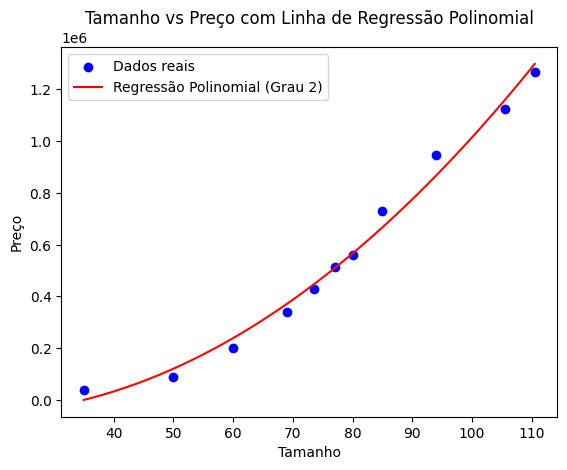

In [237]:
# Regressão polinomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Separar as variáveis de entrada (X) e saída (y)
X = df[['tamanho']].values  # Transformando em matriz
y = df['preco'].values      # Saída

# Transformação polinomial (aumenta o grau do modelo)
grau = 2  # Experimente com graus diferentes (2, 3, 4...)
poly = PolynomialFeatures(degree=grau)
X_poly = poly.fit_transform(X)

# Criar o modelo de regressão
modelo = LinearRegression()
modelo.fit(X_poly, y)  # Ajusta o modelo

# Previsões para a linha de regressão
x_range = np.linspace(df['tamanho'].min(), df['tamanho'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = modelo.predict(x_range_poly)

# Plotar os dados reais
plt.scatter(df['tamanho'], df['preco'], label="Dados reais", color="blue")

# Plotar a linha de regressão polinomial
plt.plot(x_range, y_pred, label=f"Regressão Polinomial (Grau {grau})", color="red")

# Adicionar título e rótulos
plt.title("Tamanho vs Preço com Linha de Regressão Polinomial")
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.legend()

# Mostrar o gráfico
plt.show()

In [238]:
from sklearn.metrics import mean_absolute_error
y_pred_train = modelo.predict(X_poly)
mae = mean_absolute_error(y, y_pred_train)
print(f"Erro médio absoluto (MAE): {mae:.2f}")


Erro médio absoluto (MAE): 33977.67


In [239]:
import locale

# Configurar localização para português do Brasil
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Lista de valores para prever
novos_tamanhos = [50, 80, 100, 150]

# Transformar os valores para o formato polinomial
novos_tamanhos_poly = poly.transform([[x] for x in novos_tamanhos])

# Fazer as previsões
precos_previstos = modelo.predict(novos_tamanhos_poly)

# Mostrar os resultados no formato de preço
for tamanho, preco in zip(novos_tamanhos, precos_previstos):
    preco_formatado = locale.currency(preco, grouping=True)
    print(f"Tamanho: {tamanho}, Preço previsto: {preco_formatado}")




Tamanho: 50, Preço previsto: R$ 120.902,56
Tamanho: 80, Preço previsto: R$ 566.389,12
Tamanho: 100, Preço previsto: R$ 1.014.763,79
Tamanho: 150, Preço previsto: R$ 2.665.543,16


In [240]:
# Prever para os tamanhos no DataFrame
tamanhos_existentes_poly = poly.transform(df[['tamanho']])
precos_previstos_existentes = modelo.predict(tamanhos_existentes_poly)

# Adicionar os preços previstos ao DataFrame
df['Preco_Previsto'] = precos_previstos_existentes

# Formatar os preços previstos no formato de moeda brasileira
df['Preco_Previsto'] = df['Preco_Previsto'].apply(lambda x: locale.currency(x, grouping=True))
df['preco'] = df['preco'].apply(lambda x: locale.currency(x, grouping=True))

# Mostrar o DataFrame com os preços reais e previstos formatados
print(df[['tamanho', 'preco', 'Preco_Previsto']])


'''
Para prever valores fora do intervalo dos dados de treinamento (extrapolação), 
o modelo pode perder precisão, especialmente se o grau do polinômio for muito alto.
Deve se avaliar o desempenho do modelo em relação aos dados antes de confiar nas previsões.
'''

    tamanho            preco   Preco_Previsto
0     35.00     R$ 40.000,00        R$ 343,24
1     50.00     R$ 90.000,00    R$ 120.902,56
2     60.00    R$ 200.325,00    R$ 239.121,36
3     69.01    R$ 340.452,00    R$ 371.565,49
4     73.50    R$ 430.436,00    R$ 446.743,18
5     77.00    R$ 515.000,00    R$ 509.578,39
6     80.00    R$ 560.000,00    R$ 566.389,12
7     85.00    R$ 730.563,00    R$ 667.129,02
8     94.00    R$ 945.900,00    R$ 867.535,16
9    105.50  R$ 1.125.630,00  R$ 1.159.298,38
10   110.50  R$ 1.268.941,00  R$ 1.298.641,10


c:\Users\Ed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


'\nPara prever valores fora do intervalo dos dados de treinamento (extrapolação), \no modelo pode perder precisão, especialmente se o grau do polinômio for muito alto.\nDeve se avaliar o desempenho do modelo em relação aos dados antes de confiar nas previsões.\n'